In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math

In [11]:
def radar(res):
    for i in range(7):
        #ref https://python-graph-gallery.com/390-basic-radar-chart/
        # number of variable
        categories=list(res.T)
        N = len(categories)

        values=res.iloc[:,i].values.flatten().tolist()
        values += values[:1]


        # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
        angles = [n / float(N) * 2 * math.pi for n in range(N)]
        angles += angles[:1]

        # Initialise the spider plot
        ax = plt.subplot(111, polar=True)

        # Draw one axe per variable + add labels
        plt.xticks(angles[:-1], categories, color='grey', size=9)

        # Draw ylabels
        ax.set_rlabel_position(0)
        plt.yticks([0,0.25,0.5, 0.75, 1], ["0","0.25", "0.5","0.75", "1"], color="grey", size=7)
        plt.ylim(0,1)

        # Plot data
        ax.plot(angles, values, linewidth=1, linestyle='solid', color="grey")

        # Fill area
        ax.fill(angles, values, '#E8C389', alpha=0.3)
        #plt.title("Cluster"+str(i))
        # Show the graph
        
        plt.savefig("Cluster"+str(i)+"radar.png", transparent=True)
        plt.show()


In [3]:
def mulradar2(res, clusters):
    #ref https://python-graph-gallery.com/391-radar-chart-with-several-individuals/
    # number of variable
    categories=list(res.T)
    N = len(categories)

    values=res.iloc[:,i].values.flatten().tolist()
    values += values[:1]


    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * math.pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(111, polar=True)

    # Draw one axe per variable + add labels
    plt.xticks(angles[:-1], categories, color='white', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([0,0.25,0.5, 0.75, 1], ["0","0.25", "0.5","0.75", "1"], color="white", size=7)
    plt.ylim(0,1)

    # Ind0
    colors = ['orange', 'aqua','orange','aqua', 'orange', 'aqua', 'w' ]
    for k in clusters:
        values=res.iloc[:,k].values.flatten().tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=1, linestyle='solid', label=res.columns[k][6:],color=colors[k])
        ax.fill(angles, values, colors[k], alpha=0.1)

    
    # Add legend
    #plt.legend(loc='upper right', bbox_to_anchor=(0, 0))

    #plt.title("Compare ranked Cluster "+str(clusters))
    # Show the graph
    plt.savefig("Compare ranked"+str(clusters)+"radar.png", transparent=True)
    plt.show()
    

In [26]:
df = pd.read_csv("compare.csv")
df

,V_ID,Town,Cluster_result,Cluster_name,QoL_Score,Marital status,Population Density,Natural Increase,Social Increase,Housing Price,...,Metro in 300m,Multi Metro in 300m,Metro in 500m,Multi Metro in 500m,Primary School,High School,Gym,Fire station,Police station,Shelter
0,65000090-001,Sanxia District,1,Suburb: Small Town Settlement,79.57,0.006479,0.078739,0.163000,0.113749,0.193649,...,0,0,0,0,1,1,0,1,1,0.000000
1,65000090-004,Sanxia District,1,Suburb: Small Town Settlement,72.45,0.108768,0.039914,0.190574,0.127951,0.193649,...,0,0,0,0,1,1,0,1,1,0.003876
2,65000090-025,Sanxia District,1,Suburb: Small Town Settlement,48.59,0.152930,0.043728,0.179715,0.111903,0.193649,...,0,0,0,0,1,1,0,1,1,0.003876
3,65000090-026,Sanxia District,0,Suburb: Remote and Desolate,8.27,0.112955,0.015230,0.178285,0.111110,0.193649,...,0,0,0,0,0,0,0,0,1,0.000000
4,65000090-014,Sanxia District,0,Suburb: Remote and Desolate,11.96,0.027728,0.000504,0.140115,0.113066,0.193649,...,0,0,0,0,0,0,0,0,1,0.003876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1483,63000070-025,Wanhua District,1,Suburb: Small Town Settlement,48.99,0.155362,0.236451,0.154633,0.105859,0.334884,...,0,0,0,0,1,1,0,1,1,0.139535
1484,63000070-012,Wanhua District,3,City Center,70.50,0.135148,0.193873,0.152897,0.106305,0.334884,...,1,0,1,0,1,1,0,1,1,0.306202
1485,63000070-006,Wanhua District,4,Close to Downtown: Convenient Transportation,67.74,0.158483,0.127259,0.126143,0.113523,0.334884,...,1,0,1,0,1,0,0,1,1,0.465116
1486,63000070-011,Wanhua District,3,City Center,47.04,0.188129,0.256663,0.166206,0.097829,0.334884,...,1,0,1,0,1,1,0,1,1,0.379845


In [27]:
keep = []
count = []
col = []
for i in range(7):
    df1 = df[df['Cluster_result']==i]
    keep.append(df1.describe().iloc[1,1:])
    keep.append(df1.describe().iloc[2,1:])
    count.append(df1.describe().iloc[0,0])
    count.append(df1.describe().iloc[0,0])
    col.append('Mean '+ str(i)+df['Cluster_name'][df['Cluster_result']==i].unique()[0])
    col.append('Std '+ str(i)+df['Cluster_name'][df['Cluster_result']==i].unique()[0])
    
trans = pd.DataFrame(keep, index=col)
trans['Count'] = count
trans =trans.sort_index(ascending=True)
trans

,QoL_Score,Marital status,Population Density,Natural Increase,Social Increase,Housing Price,Income,edu1,edu2,NO2,...,Multi Metro in 300m,Metro in 500m,Multi Metro in 500m,Primary School,High School,Gym,Fire station,Police station,Shelter,Count
Mean 0Suburb: Remote and Desolate,19.953882,0.080634,0.047947,0.161261,0.112252,0.195234,0.034073,0.078377,0.461637,0.113936,...,0.000000,0.037975,0.000000,0.434599,0.109705,0.021097,0.092827,0.759494,0.022618,237.0
Mean 1Suburb: Small Town Settlement,50.304053,0.123046,0.124185,0.169510,0.111611,0.230097,0.053267,0.121644,0.502817,0.095871,...,0.000000,0.072000,0.002667,0.949333,0.757333,0.101333,0.850667,0.994667,0.034605,375.0
Mean 2Outskirt: Influx of New Residents,28.700455,0.099103,0.241477,0.162057,0.112392,0.271885,0.041607,0.097456,0.492002,0.103544,...,0.000000,0.818182,0.196970,0.000000,0.606061,0.098485,0.022727,0.992424,0.001057,132.0
Mean 3City Center,73.348296,0.146582,0.233231,0.167228,0.105590,0.396434,0.085636,0.150298,0.367809,0.107586,...,0.037037,1.000000,0.370370,0.940741,0.829630,0.259259,0.970370,1.000000,0.211140,135.0
Mean 4Close to Downtown: Convenient Transportation,81.048258,0.159844,0.153755,0.173361,0.108022,0.350282,0.088601,0.162690,0.385604,0.102201,...,0.042042,1.000000,0.417417,0.930931,0.684685,0.213213,0.708709,0.990991,0.160893,333.0
"Mean 5Outskirt: High Population Density, Old Town",34.960667,0.124807,0.268134,0.165703,0.111466,0.280273,0.058542,0.126129,0.473039,0.102453,...,0.000000,0.586667,0.040000,0.973333,0.726667,0.213333,0.053333,0.993333,0.011602,150.0
Mean 6Downtown: New Taipei City,39.152857,0.124718,0.245931,0.169308,0.111810,0.275981,0.056436,0.122099,0.489243,0.114605,...,0.071429,0.634921,0.230159,0.047619,0.658730,0.119048,0.833333,0.825397,0.002492,126.0
Std 0Suburb: Remote and Desolate,13.876843,0.063077,0.086765,0.017298,0.004661,0.103256,0.033003,0.064693,0.091156,0.036049,...,0.000000,0.191540,0.000000,0.496753,0.313183,0.144012,0.290804,0.428295,0.080386,237.0
Std 1Suburb: Small Town Settlement,19.754315,0.062772,0.114650,0.022597,0.007898,0.095553,0.031303,0.063295,0.115132,0.032397,...,0.000000,0.258833,0.051640,0.219609,0.429268,0.302173,0.356893,0.072932,0.088640,375.0
Std 2Outskirt: Influx of New Residents,18.830500,0.046667,0.089321,0.021271,0.003939,0.003089,0.022919,0.046215,0.079772,0.022754,...,0.000000,0.387164,0.399224,0.000000,0.490483,0.299104,0.149600,0.087039,0.002399,132.0


In [28]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, Mean 0Suburb: Remote and Desolate to Std 6Downtown: New Taipei City
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   QoL_Score            14 non-null     float64
 1   Marital status       14 non-null     float64
 2   Population Density   14 non-null     float64
 3   Natural Increase     14 non-null     float64
 4   Social Increase      14 non-null     float64
 5   Housing Price        14 non-null     float64
 6   Income               14 non-null     float64
 7   edu1                 14 non-null     float64
 8   edu2                 14 non-null     float64
 9   NO2                  14 non-null     float64
 10  PM2.5                14 non-null     float64
 11  Hospital             14 non-null     float64
 12  Water                14 non-null     float64
 13  Green                14 non-null     float64
 14  Area                 14 non-null     

In [29]:
r = trans.iloc[:7,:].rank(ascending=True)
trans[r.columns+'_rank'] = r

In [30]:
trans.T.to_csv('visul.csv')

In [31]:
df2 = pd.read_csv('visul.csv').set_index('Unnamed: 0')
df2

,Mean 0Suburb: Remote and Desolate,Mean 1Suburb: Small Town Settlement,Mean 2Outskirt: Influx of New Residents,Mean 3City Center,Mean 4Close to Downtown: Convenient Transportation,"Mean 5Outskirt: High Population Density, Old Town",Mean 6Downtown: New Taipei City,Std 0Suburb: Remote and Desolate,Std 1Suburb: Small Town Settlement,Std 2Outskirt: Influx of New Residents,Std 3City Center,Std 4Close to Downtown: Convenient Transportation,"Std 5Outskirt: High Population Density, Old Town",Std 6Downtown: New Taipei City
Unnamed: 0,,,,,,,,,,,,,,
QoL_Score,19.953882,50.304053,28.700455,73.348296,81.048258,34.960667,39.152857,13.876843,19.754315,18.830500,18.187101,15.737176,19.381388,28.622998
Marital status,0.080634,0.123046,0.099103,0.146582,0.159844,0.124807,0.124718,0.063077,0.062772,0.046667,0.036895,0.050694,0.044679,0.043585
Population Density,0.047947,0.124185,0.241477,0.233231,0.153755,0.268134,0.245931,0.086765,0.114650,0.089321,0.067615,0.091061,0.074935,0.085172
Natural Increase,0.161261,0.169510,0.162057,0.167228,0.173361,0.165703,0.169308,0.017298,0.022597,0.021271,0.019634,0.025907,0.017965,0.023742
Social Increase,0.112252,0.111611,0.112392,0.105590,0.108022,0.111466,0.111810,0.004661,0.007898,0.003939,0.011225,0.011068,0.004933,0.005587
Housing Price,0.195234,0.230097,0.271885,0.396434,0.350282,0.280273,0.275981,0.103256,0.095553,0.003089,0.076491,0.094307,0.044741,0.011087
Income,0.034073,0.053267,0.041607,0.085636,0.088601,0.058542,0.056436,0.033003,0.031303,0.022919,0.024009,0.029402,0.022276,0.023093
edu1,0.078377,0.121644,0.097456,0.150298,0.162690,0.126129,0.122099,0.064693,0.063295,0.046215,0.037910,0.051323,0.044431,0.043320
edu2,0.461637,0.502817,0.492002,0.367809,0.385604,0.473039,0.489243,0.091156,0.115132,0.079772,0.111677,0.124700,0.090761,0.083898


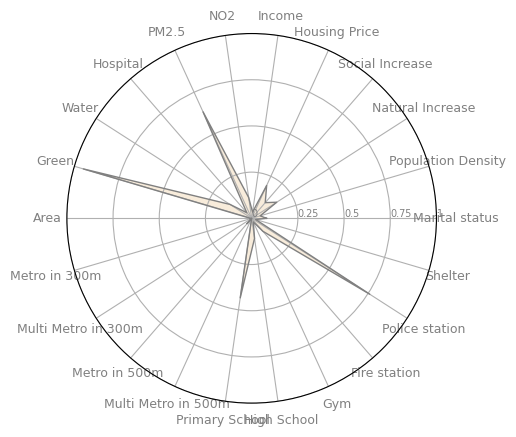

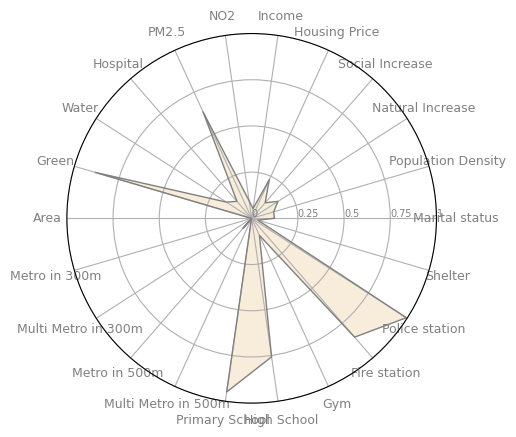

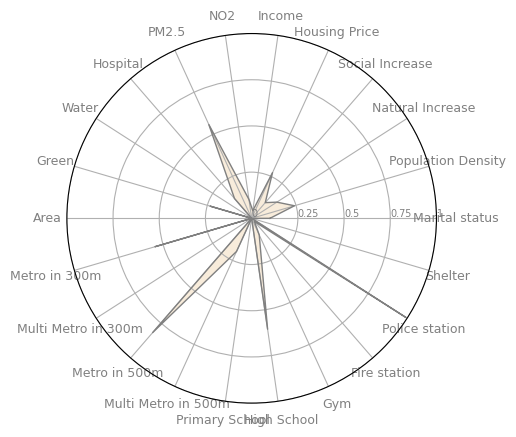

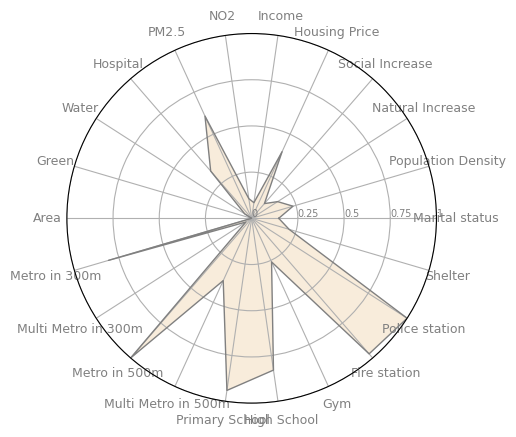

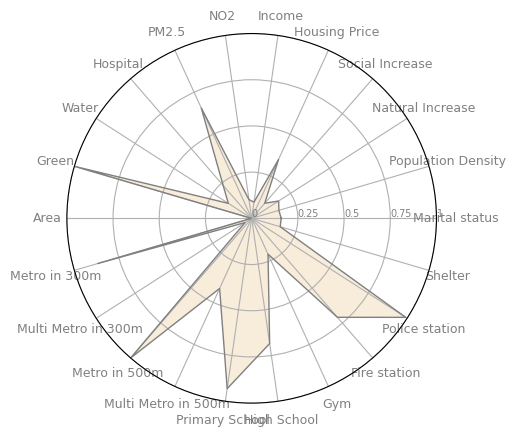

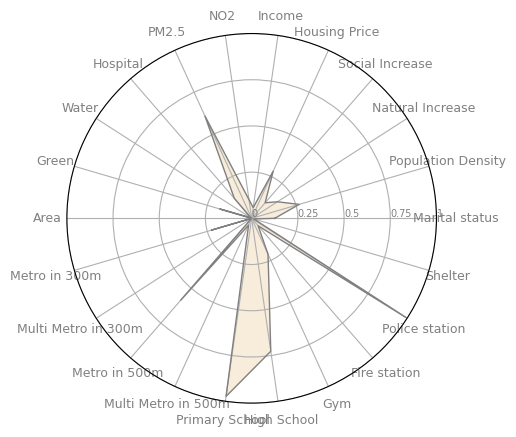

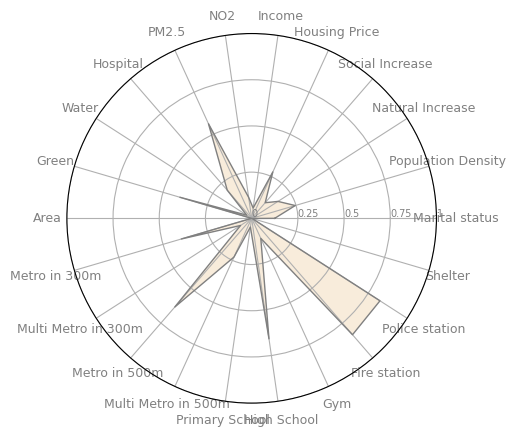

In [10]:
radar(df2.iloc[:-27,:-7].drop(index=['edu1', 'edu2', 'QoL_Score']))

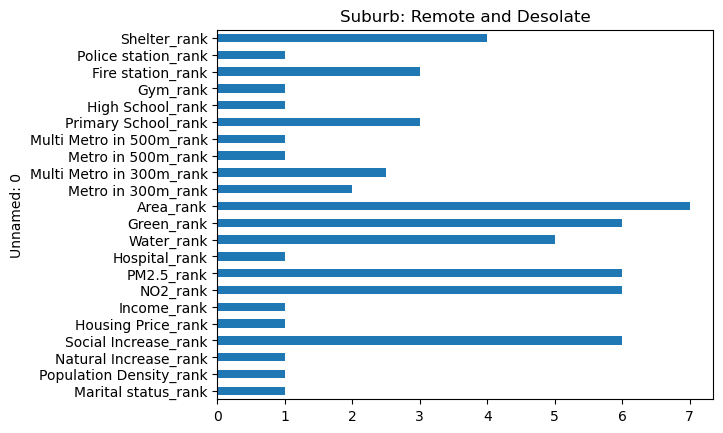

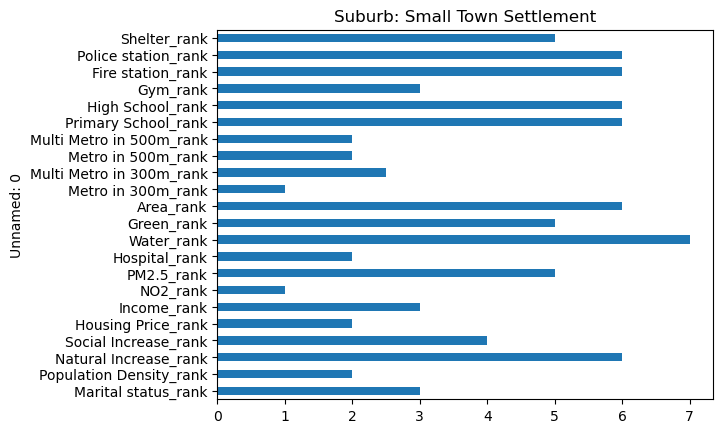

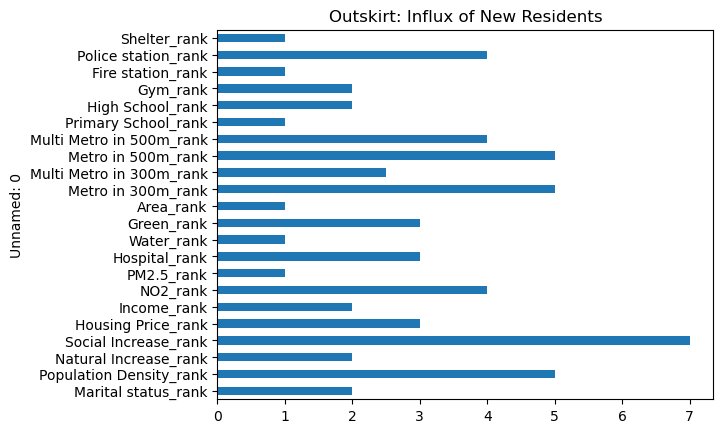

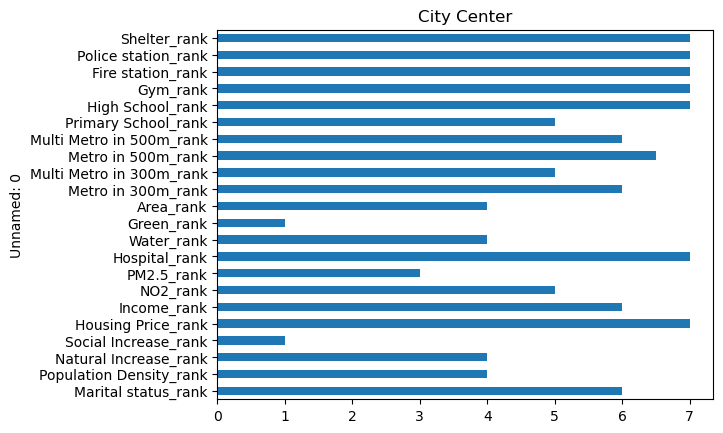

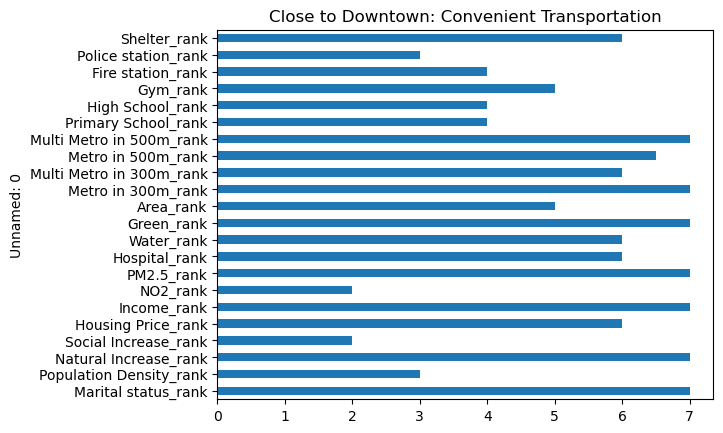

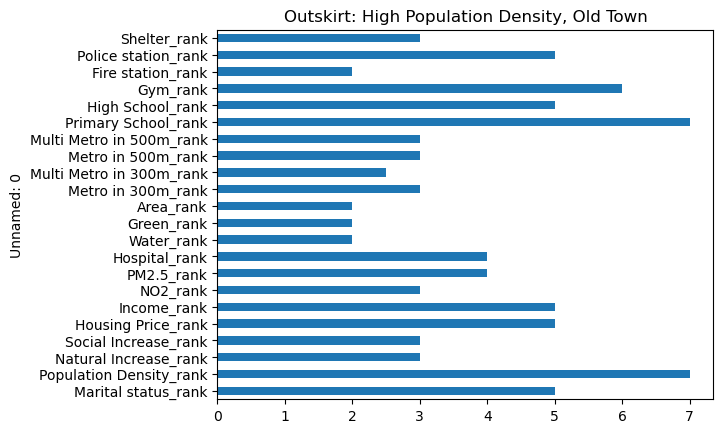

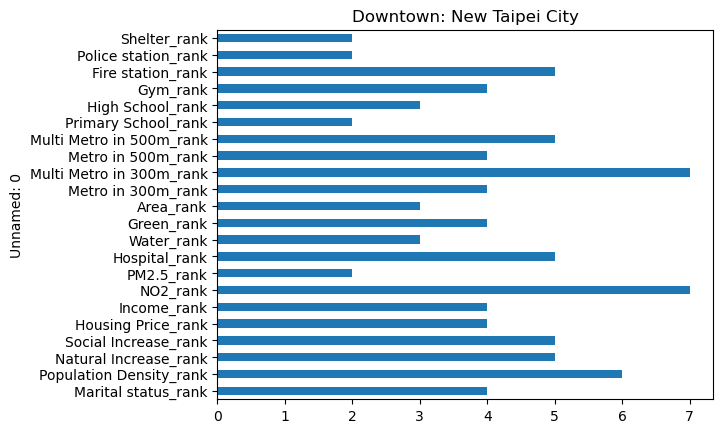

In [32]:
df3 = df2.iloc[-26:-1,:-7].drop(index=['edu1_rank', 'edu2_rank', 'QoL_Score_rank'])
for i in range(7):
    df3.iloc[:,i].plot.barh(x=df3.columns[i], y='Unnamed: 0', rot=0)
    plt.title(df3.columns[i][6:])
    plt.show()

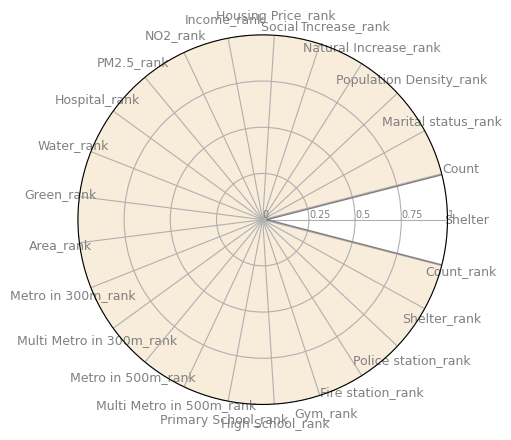

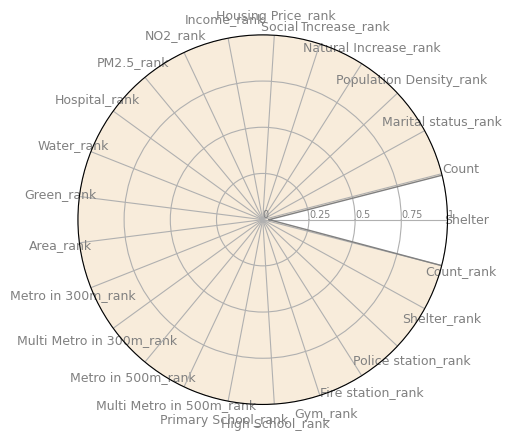

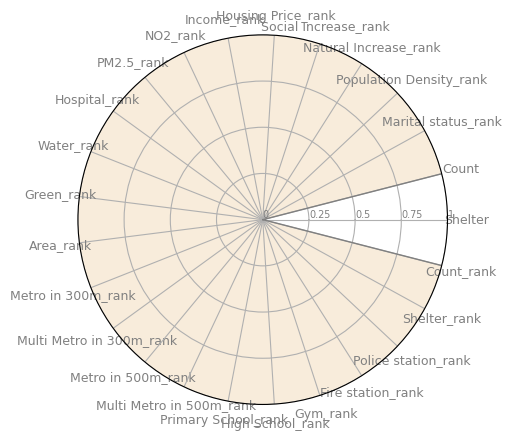

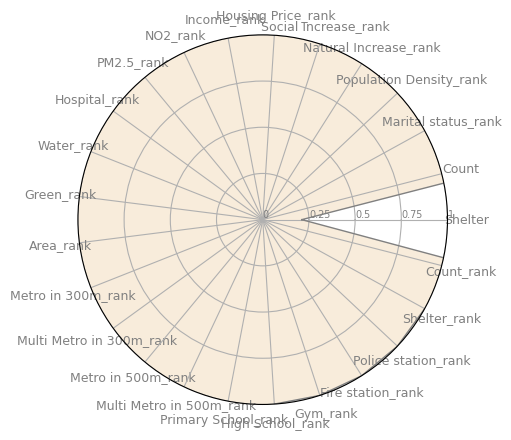

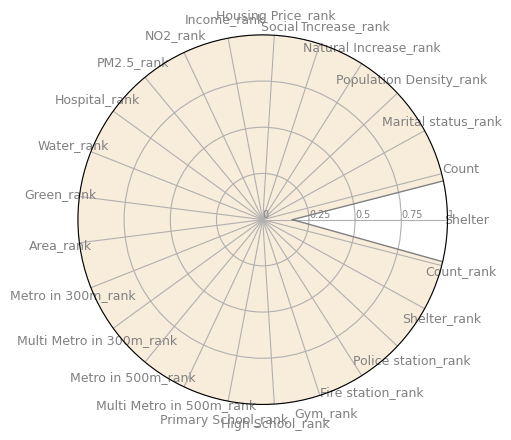

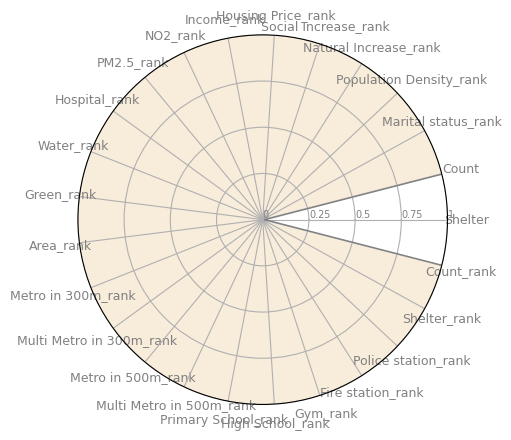

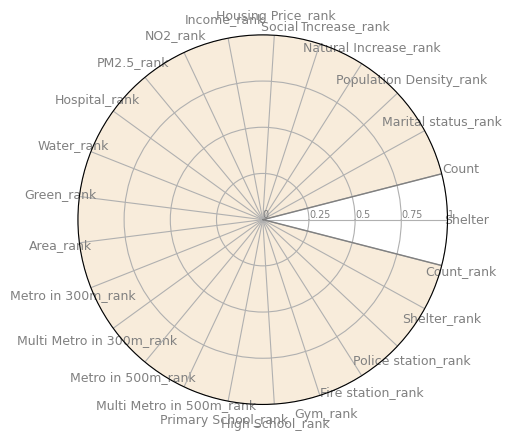

In [14]:
radar(df2.iloc[-28:,:-7].drop(index=['edu1_rank', 'edu2_rank', 'QoL_Score_rank']))

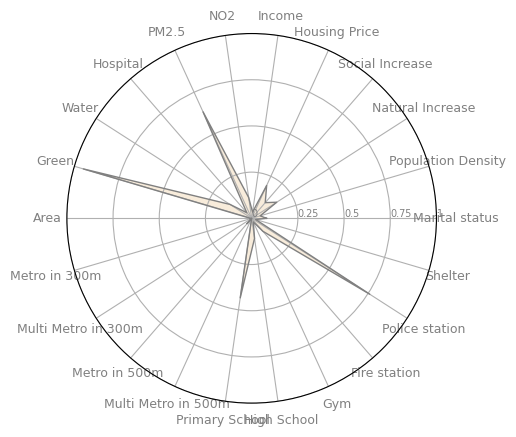

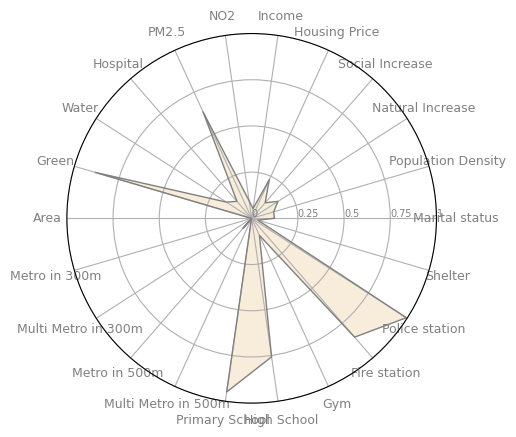

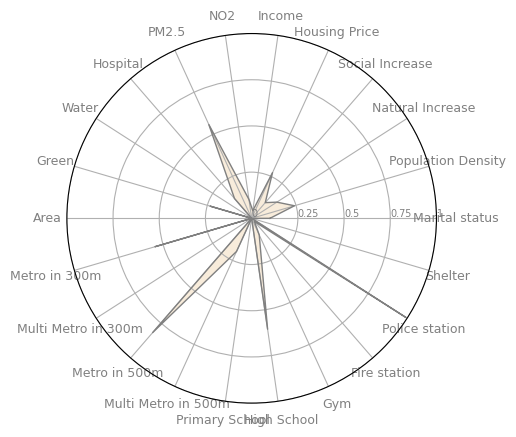

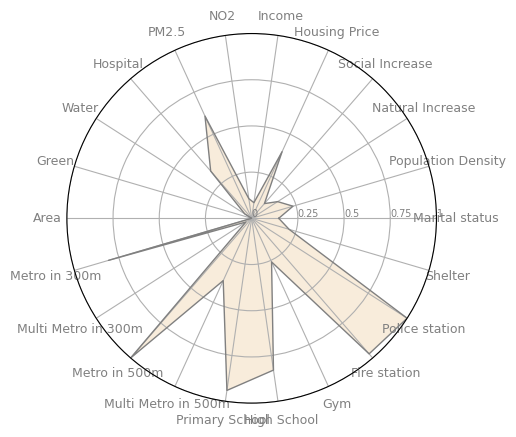

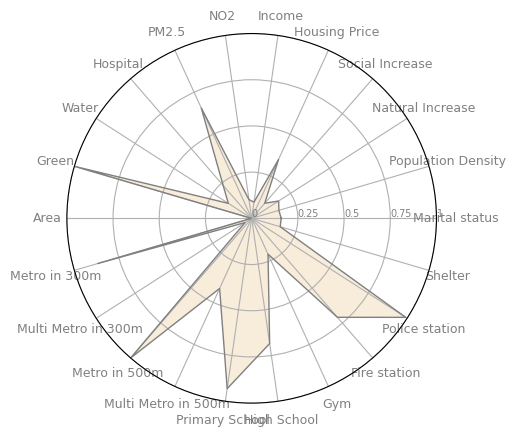

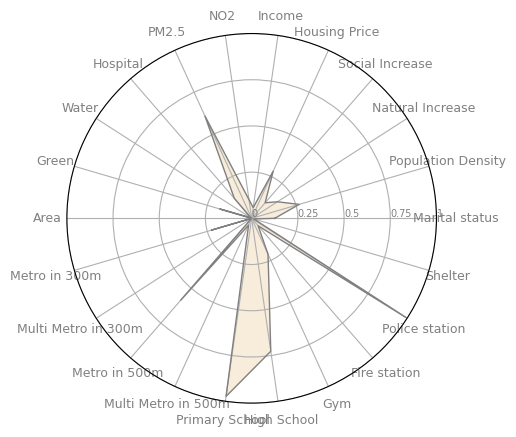

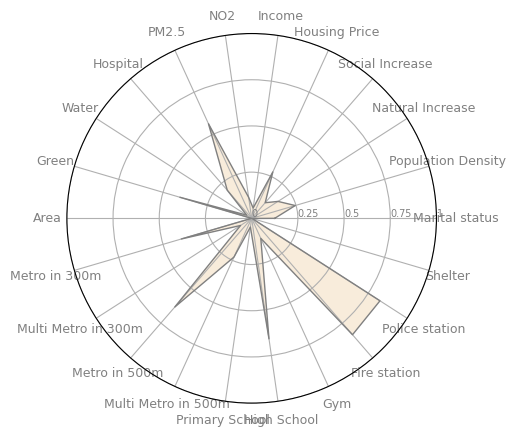

In [75]:
radar(trans.iloc[:,1:25].drop(columns=['edu1', 'edu2']).T)

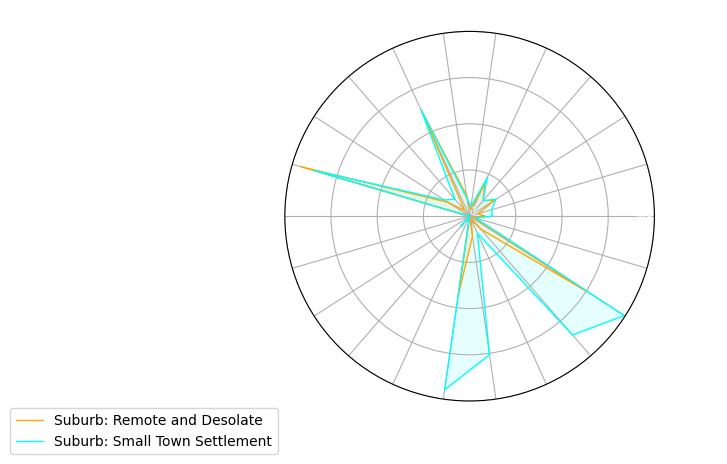

In [119]:
mulradar2(trans.iloc[:,1:25].drop(columns=['edu1', 'edu2']).T, [0,1])

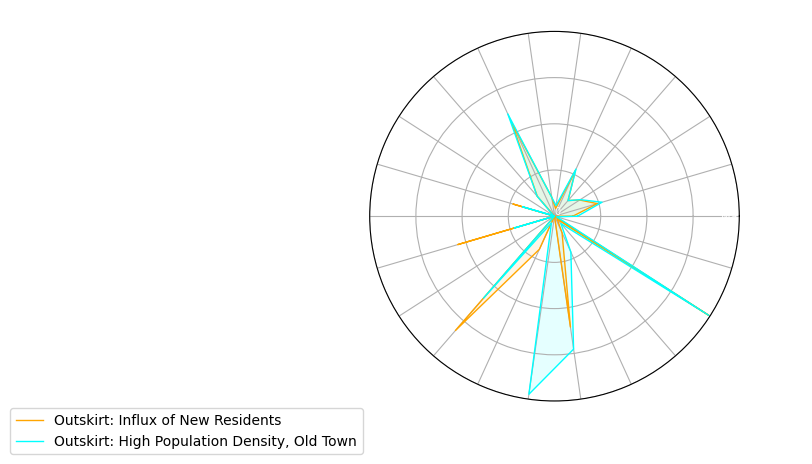

In [120]:
mulradar2(trans.iloc[:,1:25].drop(columns=['edu1', 'edu2']).T, [2,5])

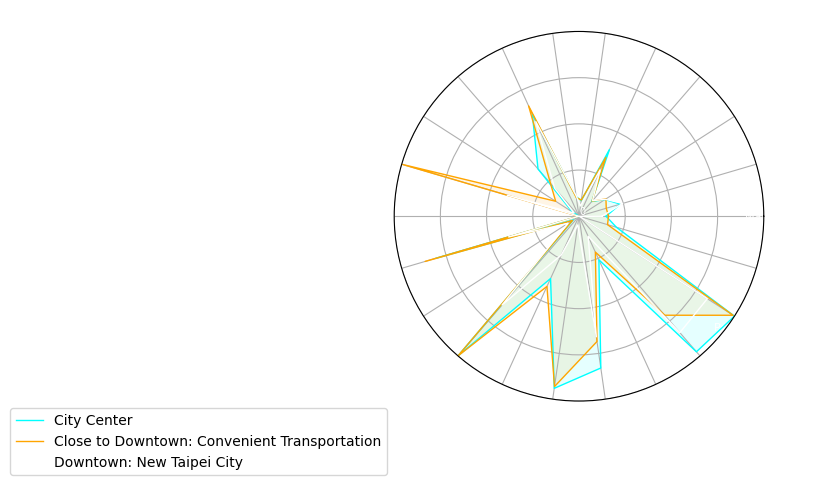

In [121]:
mulradar2(trans.iloc[:,1:25].drop(columns=['edu1', 'edu2']).T, [3,4,6])

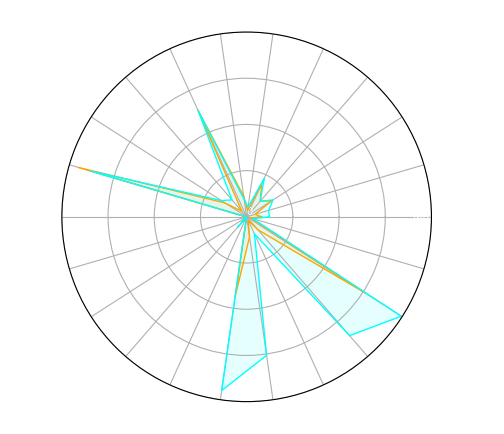

In [123]:
mulradar2(trans.iloc[:,1:25].drop(columns=['edu1', 'edu2']).T, [0,1])

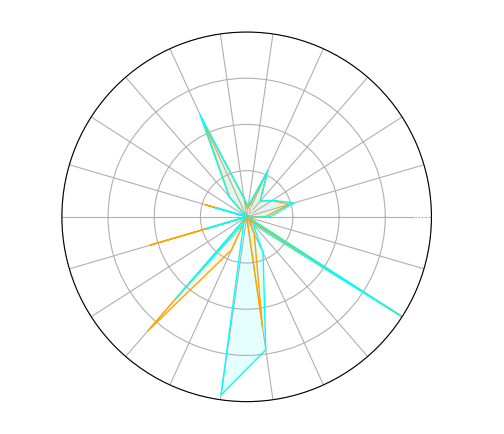

In [124]:
mulradar2(trans.iloc[:,1:25].drop(columns=['edu1', 'edu2']).T, [2,5])

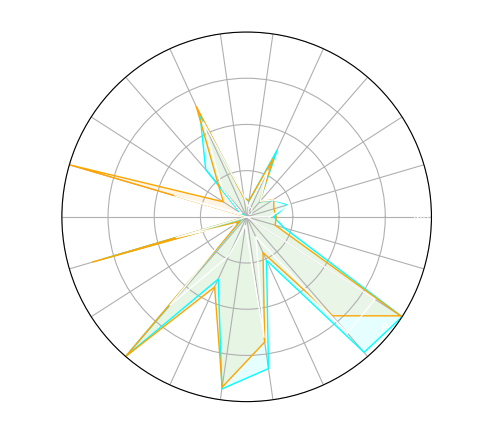

In [125]:
mulradar2(trans.iloc[:,1:25].drop(columns=['edu1', 'edu2']).T, [3,4,6])